# Word Cloud

For the input text of your script, you will need to provide a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br>

In [ ]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Whew! That was a lot. All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need to save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take effect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [3]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()
#file_contents = open('')

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `coursera.txt` (134.11 kB)


The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script. 

In [7]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", "in", "on"]
    
    cloud_dict = {}
    for text in file_contents.split():
        if text.lower() not in uninteresting_words and text.isalpha():
            if text.lower() not in cloud_dict.keys():
                cloud_dict[text.lower()] = 1
            else:
                cloud_dict[text.lower()] += 1
            
    #print(cloud)
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(cloud_dict)
    return cloud.to_array()
#calculate_frequencies(file_contents)

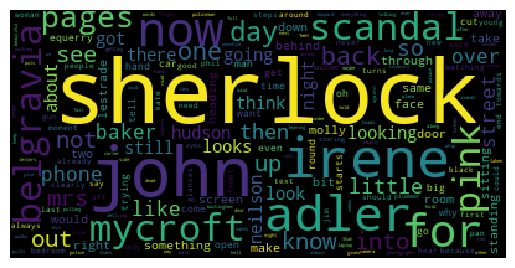

In [8]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()